# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Оглавление
### [Открытие данных](#1) 
### [Предобработка данных](#2) 
### [Посчитайте и добавьте в таблицу](#3) 
#### * [Цена квадратного метра](#4) 
#### * [День недели, месяц и год публикации объявления](#5) 
#### * [Этаж квартиры](#6) 
#### * [Соотношение площадей](#7) 
### [Исследовательский анализ данных](#8)
#### * [Задание №1](#9)
#### * [Задание №2](#10)
#### * [Задание №3](#11)
#### * [Задание №4](#12)
#### * [Задание №5](#13)
#### * [Задание №6](#13)
#### * [Задание №7](#15)
### [Общий вывод](#16)

### Шаг 1. Откройте файл с данными и изучите общую информацию. <a id="1"></a>

In [1]:
# загрузим наш файл и посмотрим краткую информацию о типах данных, столбцах и их содеражнии:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [2]:
# визуально осмотрим первые пять строк из датафрейма:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
# рассмотрим числовое описание датафрейма:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Вывод:

Рассмотрев данные выделим особенности:
- много пропущенных данных в большом количестве столбцев (пример:ceiling_height, balcony, ponds_nearest  и тд.)
- есть столбцы где необходимо будет поменять тип данных(пример: first_day_exposition,is_apartment  и тд.)
- есть аномальные значения ( пример: total_area	 = 12 м2, ceiling_height = 1 м. и тд.)




### Шаг 2. Предобработка данных<a id="2"></a>

In [4]:
# Определим кол-во пропущенных значений:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [5]:
#проверим сколько пропущенных значений в столбцах от общего кол-ва значений:
data.isnull().sum().sort_values(ascending=False)/len(data)

is_apartment            0.882906
parks_nearest           0.659100
ponds_nearest           0.615596
balcony                 0.486054
ceiling_height          0.387991
airports_nearest        0.233850
cityCenters_nearest     0.232879
parks_around3000        0.232837
ponds_around3000        0.232837
days_exposition         0.134225
kitchen_area            0.096122
living_area             0.080299
floors_total            0.003629
locality_name           0.002068
first_day_exposition    0.000000
last_price              0.000000
total_area              0.000000
studio                  0.000000
rooms                   0.000000
floor                   0.000000
open_plan               0.000000
total_images            0.000000
dtype: float64

In [6]:
# Проверим на наличие дубликатов:
data.duplicated().sum()

0

In [7]:
# пропущенных значений в столбце 'is_apartment' максимальное кол-во
# переведем тип данных в булевый:
data['is_apartment'] = data['is_apartment'].astype(bool)

In [8]:
# заменим все пропущенные значения на False, т.к. если человек не указал, то скорее всего  у него не апартаменты, а жилая квартира:
data['is_apartment'] = data['is_apartment'].fillna(False)

In [9]:
#проверим изменения:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around3000

In [10]:
# Заменим пропущенные значения на 0 в столбце 'balcony'(т.к. скорее всего если человек не указал, значит его нет)
# и поменяем тип данных на int:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'] = data['balcony'].astype(int)

In [11]:
# проверим столбец с уникальными названиями городов/поселков и тд:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [12]:
# приведем все значения к нижнему регистру:
data['locality_name']= data['locality_name'].str.lower()

In [13]:
# приведем слова поселок и посёлок к одному написанию :
data['locality_name'] = data['locality_name'].str.replace('посёлок','поселок')

In [14]:
# визуально проверим изменения:
data['locality_name'].unique()

array(['санкт-петербург', 'поселок шушары', 'городской поселок янино-1',
       'поселок парголово', 'поселок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина',
       'деревня фёдоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'поселок металлострой',
       'поселок городского типа лебяжье',
       'поселок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'поселок аннино',
       'поселок городского типа ефимовский', 'поселок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'поселок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', 'поселок новый свет

In [15]:
data['locality_name'].value_counts()

санкт-петербург                     15721
поселок мурино                        556
поселок шушары                        440
всеволожск                            398
пушкин                                369
                                    ...  
поселок тёсово-4                        1
деревня пикколово                       1
садовое товарищество новая ропша        1
поселок шугозеро                        1
деревня кисельня                        1
Name: locality_name, Length: 330, dtype: int64

In [16]:
# Заменим пропущенные значение  для удобства работы:
data['locality_name'] = data['locality_name'].fillna('Неопределено')

In [17]:
# Убедимся, что пропущенные значения отсутствуют:
data['locality_name'].isnull().sum()

0

### Вывод

В этом разделе мы обработали исходные данные:
- перевели в другой тип данных ( пример: balcony, is_apartment )
- разобрались со столбцем названий городов ( перевели в нижний регистр, решили проблему с буквой Ё, заменили пропущенные значения)

Решено было не обрабатывать пропуски во всех столбцах по двум причинам, часть нам не понадобятся для решения поставленных задач, а другая часть это невозможность востановить исходные данные без существенного искажения данных.

In [18]:
# Заполним пропуски в столбце высота потолка за счет медианы по населенному пункту:
for locality_name in data['locality_name'].unique():
    median_ceiling_height = data.loc[data['locality_name'] == locality_name, 'ceiling_height'].median()
    data.loc[(data['ceiling_height'].isnull()) & (data['locality_name'] == locality_name), 'ceiling_height'] = median_ceiling_height

In [19]:
# Заполним пропуски в столбце всего этаже в здании по моде распредления в населенном пункте:
for locality_name in data['locality_name'].unique():
    mode_floors_total  = data.loc[data['locality_name'] == locality_name, 'floors_total'].mode
    data.loc[(data['floors_total'].isnull()) & (data['locality_name'] == locality_name), 'floors_total'] = mode_floors_total

In [20]:
# Заменим пропущенные значения в столбце Жилая площадь на разницу между Общей площадью и площадью кухни:
data['living_area'] = data['living_area'].fillna(data['total_area'] - data['kitchen_area'])


In [21]:
# Заменим пропущенные значения в столбце Площадь кухни на разницу между Общей площадью и жилой площадью:
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area'] - data['living_area'])


In [22]:
# Заполним пропуски в столбце airports_nearest по медианне распредления в населенном пункте:
for locality_name in data['locality_name'].unique():
    median_airports_nearest  = data.loc[data['locality_name'] == locality_name, 'airports_nearest'].median()
    data.loc[(data['airports_nearest'].isnull()) & (data['locality_name'] == locality_name), 'airports_nearest'] = median_airports_nearest

In [23]:
# Заполним пропуски в столбце cityCenters_nearestпо медиане распредления в населенном пункте:
for locality_name in data['locality_name'].unique():
    median_cityCenters_nearest  = data.loc[data['locality_name'] == locality_name, 'cityCenters_nearest'].median()
    data.loc[(data['cityCenters_nearest'].isnull()) & (data['locality_name'] == locality_name), 'cityCenters_nearest'] = median_cityCenters_nearest

In [24]:
# Заменим пропущенные значение в parks_around3000 на 0:
data['parks_around3000'] = data['parks_around3000'].fillna(0)

In [25]:
# Заменим пропущенные значение в ponds_around3000  на 0:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

In [26]:
# Заменим пропущенные значение в parks_nearest на 3001:
data['parks_nearest'] = data['parks_nearest'].fillna(3001)

In [27]:
# Заменим пропущенные значение в ponds_nearest  на 3001:
data['ponds_nearest'] = data['ponds_nearest'].fillna(3001)

In [28]:
# Заполним пропуски в столбце days_exposition медиане распредления в населенном пункте:
for locality_name in data['locality_name'].unique():
    median_days_exposition  = data.loc[data['locality_name'] == locality_name, 'days_exposition'].median()
    data.loc[(data['days_exposition'].isnull()) & (data['locality_name'] == locality_name), 'days_exposition'] = median_days_exposition

### Шаг 3. Посчитайте и добавьте в таблицу<a id="3"></a>

#### Цена квадратного метра<a id="4"></a>

In [29]:
# Добавим новый столбец цена за м2:
data['price_m2'] = (data['last_price'] / data['total_area']).round(decimals=1)
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,True,...,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,95.0,120370.4
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.63,11,18.6,1,True,...,2,поселок шушары,12817.0,18603.0,0.0,3001.0,0.0,3001.0,81.0,82920.8
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.70,5,34.3,4,True,...,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.7
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.70,14,NaN,9,True,...,0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.1
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,True,...,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.0


#### День недели, месяц и год публикации объявления]<a id="5"></a>

In [30]:
# Переведем дату в понятный вид и создадим столбцы с датой с указанием дня недели, с указанием месяца и года:
data['data_time'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')
data['weekday'] = data['data_time'].dt.day_name()
data['month'] = data['data_time'].dt.month_name()
data['year'] = data['data_time'].dt.year
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,data_time,weekday,month,year
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,True,...,1.0,482.0,2.0,755.0,95.0,120370.4,2019-03-07,Thursday,March,2019
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.63,11,18.6,1,True,...,0.0,3001.0,0.0,3001.0,81.0,82920.8,2018-12-04,Tuesday,December,2018
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.70,5,34.3,4,True,...,1.0,90.0,2.0,574.0,558.0,92785.7,2015-08-20,Thursday,August,2015
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.70,14,NaN,9,True,...,2.0,84.0,3.0,234.0,424.0,408176.1,2015-07-24,Friday,July,2015
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,True,...,2.0,112.0,1.0,48.0,121.0,100000.0,2018-06-19,Tuesday,June,2018


#### Этаж квартиры<a id="6"></a>

In [32]:
# напишем функцию для разделения этажа  на первый, последний или другой:
def floors_type (floor):
    floors_total = floor['floors_total'] #поменяли data на floor, потому что обращаемся к рядам, а не к датафрейму целиком
    floor =floor['floor']
    if floor ==1:
        return 'Первый'
    if floor == floors_total:
        return 'Последний'
    return 'Другой'

In [33]:
# Создадим новый столбец 'floors_type' применив метод apply, axis =1 т.к. обращемся к рядам:
data['floors_type'] = data.apply(floors_type, axis =1)
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,data_time,weekday,month,year,floors_type
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,True,...,482.0,2.0,755.0,95.0,120370.4,2019-03-07,Thursday,March,2019,Другой
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.63,11,18.6,1,True,...,3001.0,0.0,3001.0,81.0,82920.8,2018-12-04,Tuesday,December,2018,Первый
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.70,5,34.3,4,True,...,90.0,2.0,574.0,558.0,92785.7,2015-08-20,Thursday,August,2015,Другой
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.70,14,NaN,9,True,...,84.0,3.0,234.0,424.0,408176.1,2015-07-24,Friday,July,2015,Другой
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,True,...,112.0,1.0,48.0,121.0,100000.0,2018-06-19,Tuesday,June,2018,Другой


#### Соотношения площадей<a id="7"></a>

In [34]:
# Добавим столбцы соотношением жилой и общей площади, а также соотношением площади кухни к общей площади:
# там где нет данных, будут пропуски
data['living_total_ratio'] = data['living_area'] / data['total_area']
data['kitchen_total_ratio'] = data['kitchen_area'] / data['total_area']
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_m2,data_time,weekday,month,year,floors_type,living_total_ratio,kitchen_total_ratio
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,True,...,755.0,95.0,120370.4,2019-03-07,Thursday,March,2019,Другой,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.63,11,18.6,1,True,...,3001.0,81.0,82920.8,2018-12-04,Tuesday,December,2018,Первый,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.70,5,34.3,4,True,...,574.0,558.0,92785.7,2015-08-20,Thursday,August,2015,Другой,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.70,14,NaN,9,True,...,234.0,424.0,408176.1,2015-07-24,Friday,July,2015,Другой,NaN,NaN
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,True,...,48.0,121.0,100000.0,2018-06-19,Tuesday,June,2018,Другой,0.320000,0.410000


### Вывод

В данном разделе мы провели вычесления:
- посчитали стоимость м2 
- преобразовали дату с помощью специального метода и добавили в таблицу столбцы с конкретным значением дня недели, месяца и года 
- написали специальную функцию, которая для каждой квартиры указывает этаж (первый, последний или другой)
- нашли соотношения площадей кухни, жилой к общей площади квартиры

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:<a id="8"></a>

#### Задание №1<a id="9"></a>

Text(0, 0.5, 'Количество, шт')

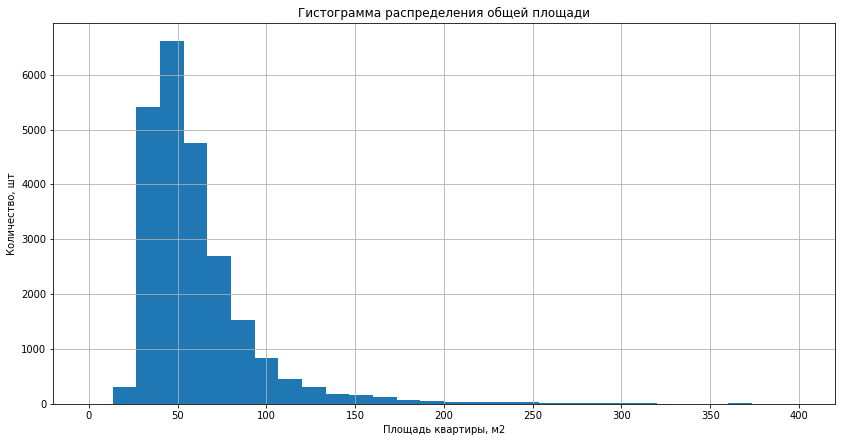

In [35]:
# Построим гистограмму для столбца'total_area':
data.hist('total_area',bins=30,range=(0,400), figsize=(14, 7), grid=True,)
plt.title('Гистограмма распределения общей площади')
plt.xlabel('Площадь квартиры, м2')
plt.ylabel('Количество, шт')

Text(0, 0.5, 'Количество, шт')

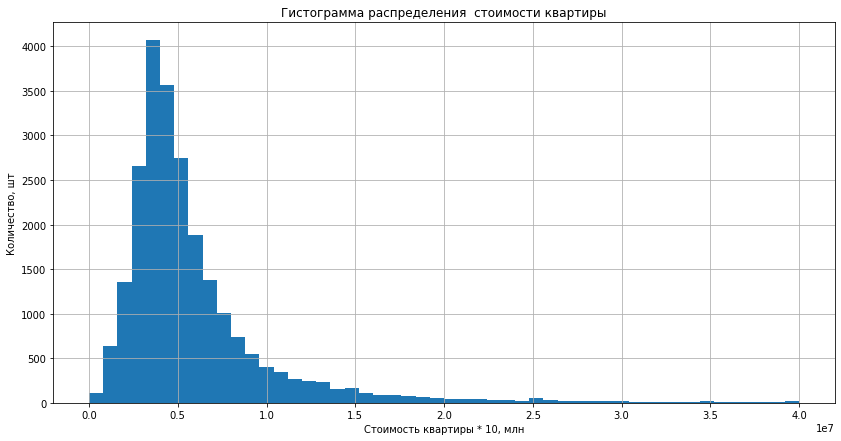

In [36]:
# Построим гистограмму для столбца 'last_price':
data.hist('last_price',bins=50,range=(0,40000000), figsize=(14, 7), grid=True)
plt.title('Гистограмма распределения  стоимости квартиры')
plt.xlabel('Стоимость квартиры * 10, млн')
plt.ylabel('Количество, шт')

Text(0, 0.5, 'Количество, шт')

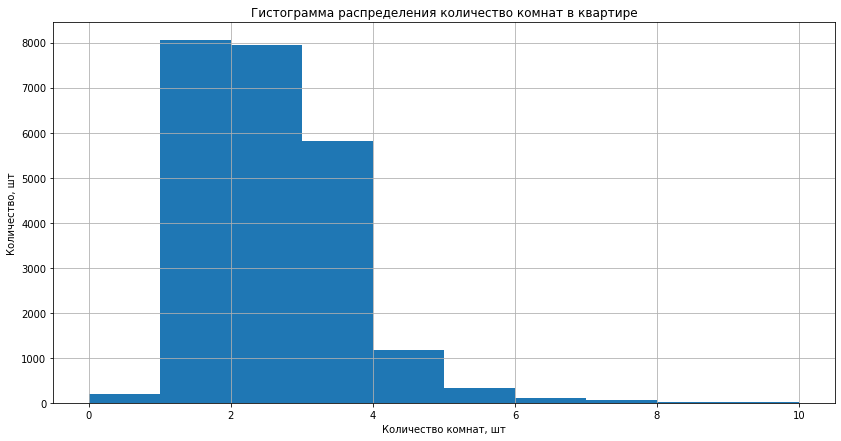

In [37]:
# Построим гистограмму для столбца 'rooms':
data.hist('rooms',bins=10,range=(0,10), figsize=(14, 7), grid=True)
plt.title('Гистограмма распределения количество комнат в квартире')
plt.xlabel('Количество комнат, шт')
plt.ylabel('Количество, шт')

Text(0, 0.5, 'Количество, шт')

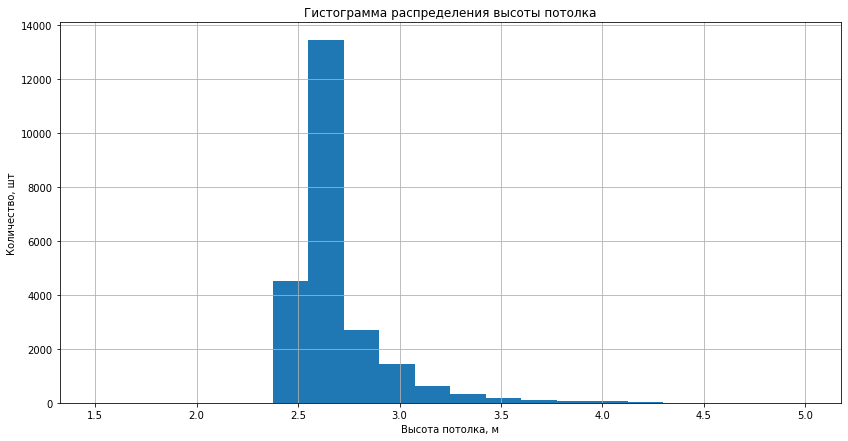

In [38]:
# Построим гистограмму для столбца 'ceiling_height':
data.hist('ceiling_height',bins=20,range=(1.5,5), figsize=(14, 7), grid=True)
plt.title('Гистограмма распределения высоты потолка')
plt.xlabel('Высота потолка, м')
plt.ylabel('Количество, шт')

#### Вывод

По результам первого задания:
- мы построили интересующие нас гистограммы ( высота потолка, кол-во комнат, цен и общей площади)
- получили данные о том, что у нас нормальные  распределения данных в столбцах в датафрейме

Типичная квартира в продаже: Одно-двух комнатная квартира с общей площадью 50м2 и высотой потолков 2.7м за 4млн. рублей. 
Что совпадает с моим общим представлением о том, каких квартир в РФ больше всего.



#### Задание №2<a id="10"></a>

Text(0, 0.5, 'Количество, шт')

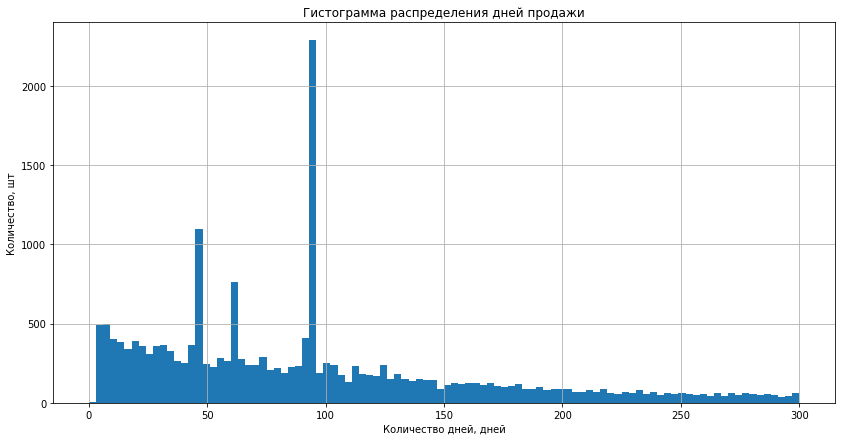

In [39]:
# Построим гистограмму для столбца 'days_exposition':
data.hist('days_exposition',bins=100,range=(0,300), figsize=(14, 7), grid=True)
plt.title('Гистограмма распределения дней продажи')
plt.xlabel('Количество дней, дней')
plt.ylabel('Количество, шт')

In [40]:
# Найдем численное описание столбца 'days_exposition':
data['days_exposition'].describe()

count    23624.000000
mean       170.322172
std        207.220958
min          1.000000
25%         45.000000
50%         95.000000
75%        201.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [41]:
#убедимся и посчитаем среднее:
data['days_exposition'].std()

207.22095831749502

In [42]:
# Убедимся и посчитаем медиану:
data['days_exposition'].mean()

170.32217236708433

#### Вывод

По результатам второго задания:
- построили гистограмму с распределением по кол-ву дней потраченных на продажу квартиры
- типичный срок продажи квартиры 45-50 дней, все что меньше можно назвать быстрой продажей
- на гистограмме наблюдаем резкое изменение на 80-95 день,поэтому все что больше  это необычно большой срок
- замечаны модальный пики для значений в 45, 60 и 90 дней, возможно они связаны с автоматическим закрытием объявлением на площадке.
- медиана 180 дней и среднее значение 219 дней существенно отличаются из-за наличия в данных крупных сроков продаж в плоть до 1580 дней.

#### Задание №3<a id="11"></a>

In [43]:
# Посмотрим еще раз на численное описание столбцов, чтобы определить редкие/выбивающиеся значения:
data[['total_area','last_price','rooms','ceiling_height' ]].describe()

,total_area,last_price,rooms,ceiling_height
count,23699.000000,2.369900e+04,23699.000000,23593.000000
mean,60.348651,6.541549e+06,2.070636,2.732713
std,35.654083,1.088701e+07,1.078405,1.003886
min,12.000000,1.219000e+04,0.000000,1.000000
25%,40.000000,3.400000e+06,1.000000,2.550000
50%,52.000000,4.650000e+06,2.000000,2.700000
75%,69.900000,6.800000e+06,3.000000,2.700000
max,900.000000,7.630000e+08,19.000000,100.000000


Text(0, 0.5, 'Площадь, м2')

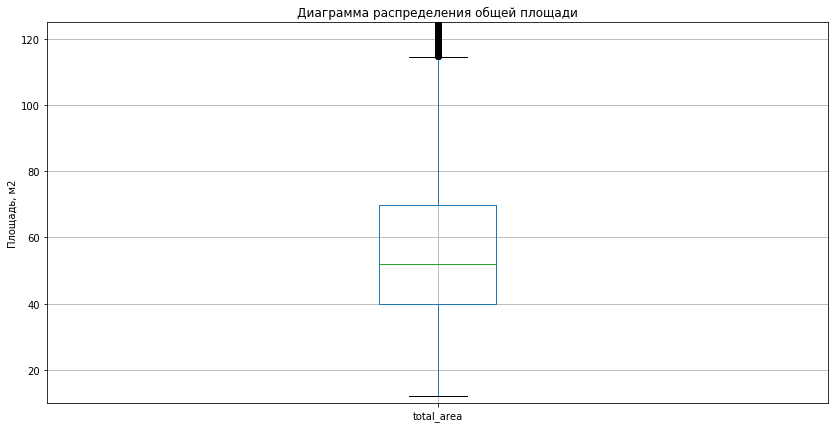

In [44]:
# Построим диаграмму размаха для столбца 'total_area':
data.boxplot('total_area', figsize=(14, 7), grid=True)
plt.ylim(10,125)
plt.title('Диаграмма распределения общей площади')
plt.ylabel('Площадь, м2')

Text(0, 0.5, 'Цена *10, млн')

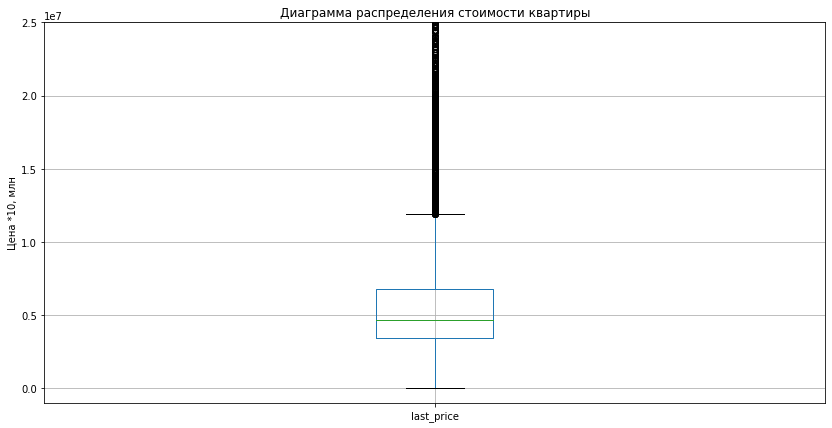

In [45]:
# Построим диаграмму размаха для столбца 'last_price':
data.boxplot('last_price', figsize=(14, 7), grid=True)
plt.ylim(-1000000,25000000)
plt.title('Диаграмма распределения стоимости квартиры')
plt.ylabel('Цена *10, млн')

(-2, 10)

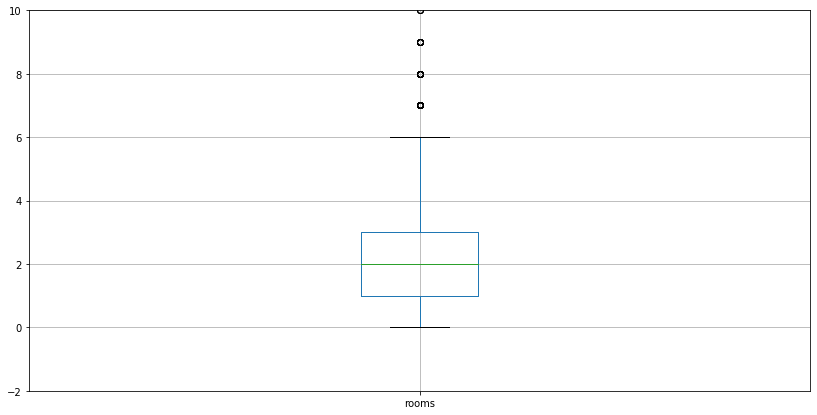

In [46]:
# Построим диаграмму размаха для столбца 'rooms':
data.boxplot('rooms', figsize=(14, 7), grid=True)
plt.ylim(-2,10)

Text(0, 0.5, 'Высота, м')

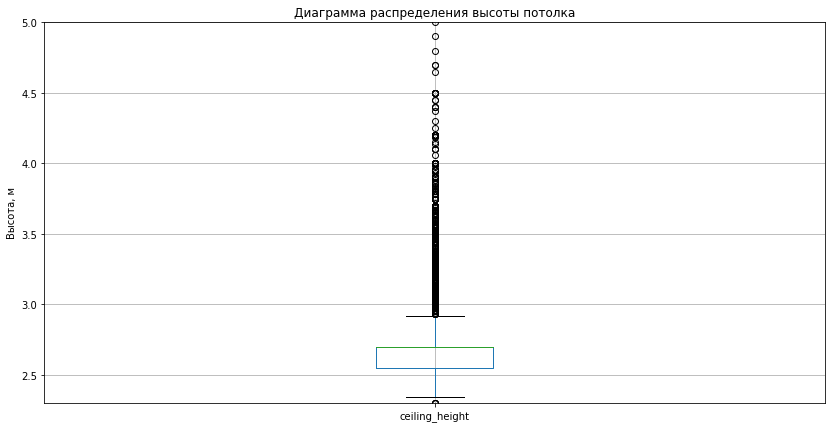

In [47]:
# Построим диаграмму размаха для столбца 'ceiling_height':
data.boxplot('ceiling_height', figsize=(14, 7), grid=True)
plt.ylim(2.3,5)
plt.title('Диаграмма распределения высоты потолка')
plt.ylabel('Высота, м')

In [48]:
# создадим новую "очищенную" таблицу, создав срез используя метод query():
clear_data =  data.query('total_area >= 12 and total_area <= 114 and last_price >= 12000 and last_price <= 12000000 and rooms <= 6 and ceiling_height >= 2.4 and ceiling_height <= 2.7 ')


#### Вывод

По результатам третьего задания:
-  размах площади квартир лежит в диапазоне от 12 до 114 м2 
- размах цен на квартиры 12 тыс. руб до 12 млн.руб ( Но мне все-таки кажется, что стоимость квартиры 12 тысяч. руб как-то выделятся и это подозрительно)
- размах кол-во комнат от 0 (студия) до 6, что в пределах нормы
- разма высоты потолка от 2,4 до 2.7 

Создали новую таблицу clear_data с очищенными от аномальных значений 

#### Задание №4<a id="12"></a>

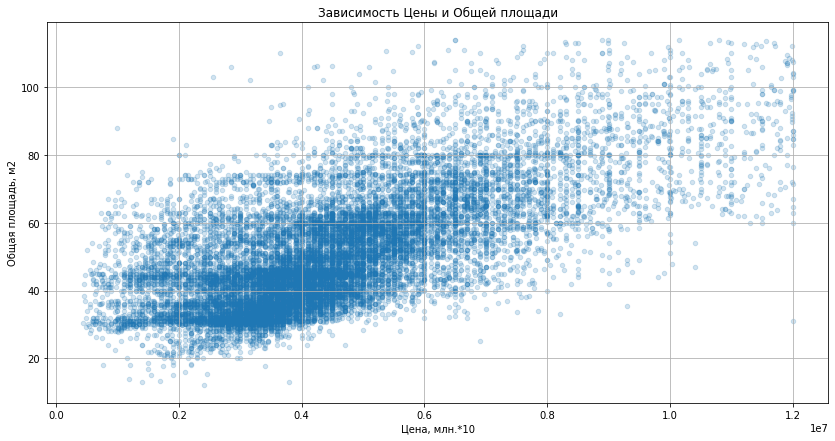

In [49]:
# Построим  график зависимости цены от площади квартиры:
clear_data.plot(x='last_price', y='total_area', kind='scatter', title='Зависимость Цены и Общей площади', figsize=(14, 7), grid=True, alpha=0.2)
plt.xlabel('Цена, млн.*10')
plt.ylabel('Общая площадь, м2')
plt.show()

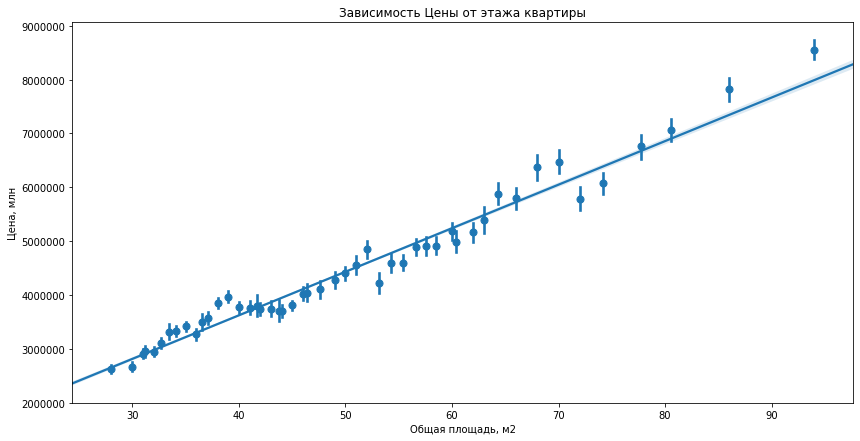

In [50]:
# Построим  график зависимости цены от площади квартиры:
plt.figure(figsize=(14, 7))
sns.regplot(y="last_price", x="total_area", data=clear_data, x_bins=50)
plt.title('Зависимость Цены от этажа квартиры')
plt.xlabel('Общая площадь, м2')
plt.ylabel('Цена, млн')
plt.show()

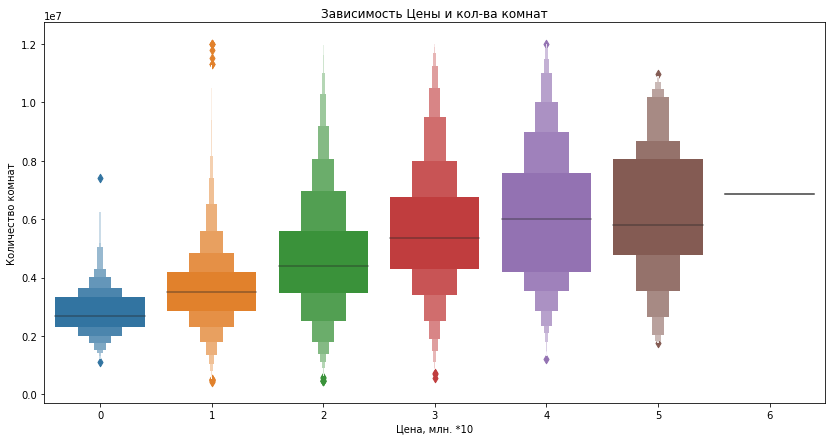

In [51]:
# Построим  график зависимости цены от площади квартиры:
#clear_data.plot(x='last_price', y='rooms', kind='scatter', title='Зависимость Цены и кол-ва комнат', figsize=(14, 7), grid=True, alpha=0.2)
plt.figure(figsize=(14, 7))
sns.boxenplot(x='rooms', y='last_price', data=clear_data )


plt.title('Зависимость Цены и кол-ва комнат')
plt.xlabel('Цена, млн. *10')
plt.ylabel('Количество комнат')
plt.show()

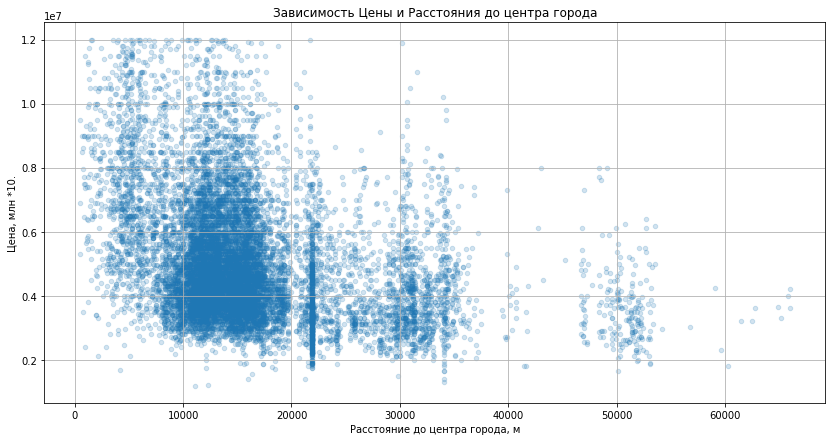

In [52]:
# Построим  график зависимости цены от расстояния до центра города:
clear_data.plot(y='last_price', x='cityCenters_nearest', kind='scatter', title='Зависимость Цены и Расстояния до центра города', figsize=(14, 7), grid=True, alpha=0.2)
plt.ylabel('Цена, млн *10.')
plt.xlabel('Расстояние до центра города, м')
plt.show()

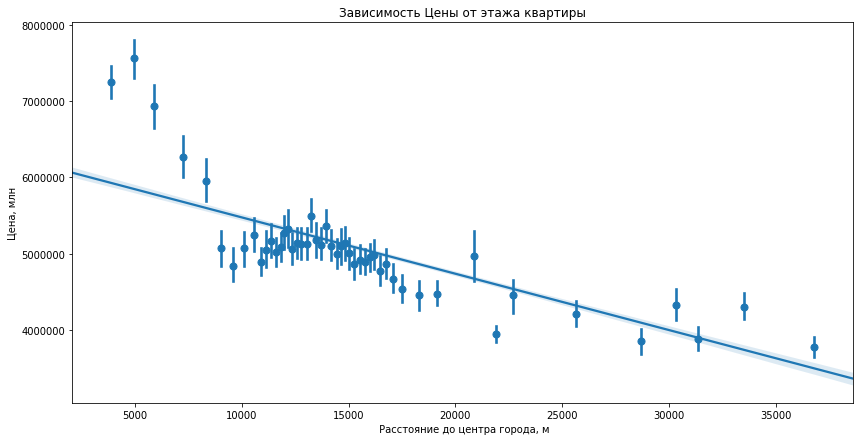

In [53]:
# Построим  график зависимости цены от расстояния до центра города:
plt.figure(figsize=(14, 7))
sns.regplot(x="cityCenters_nearest", y="last_price", data=clear_data,x_bins=50)
plt.title('Зависимость Цены от этажа квартиры')
plt.xlabel(' Расстояние до центра города, м')
plt.ylabel('Цена, млн')
plt.show()

In [54]:
# Построим таблицу корреляции для отдельных столбцев:
сorr_parm = clear_data[['total_area','last_price','cityCenters_nearest','rooms']].corr().round(2)
display(сorr_parm)

,total_area,last_price,cityCenters_nearest,rooms
total_area,1.00,0.68,-0.09,0.80
last_price,0.68,1.00,-0.33,0.42
cityCenters_nearest,-0.09,-0.33,1.00,-0.05
rooms,0.80,0.42,-0.05,1.00


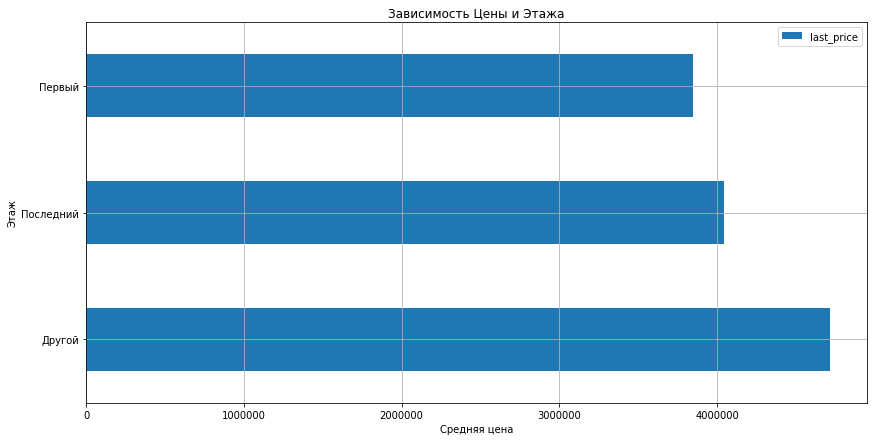

In [55]:
# Построим  график зависимости цены от этажа:
(clear_data
 .pivot_table(index = 'floors_type', values = 'last_price', aggfunc='mean' )
 .sort_values(by='last_price', ascending =False)
 .plot(y='last_price', kind='barh', title='Зависимость Цены и Этажа', figsize=(14, 7), grid=True)
)
plt.xlabel('Средняя цена')
plt.ylabel('Этаж')
plt.show()

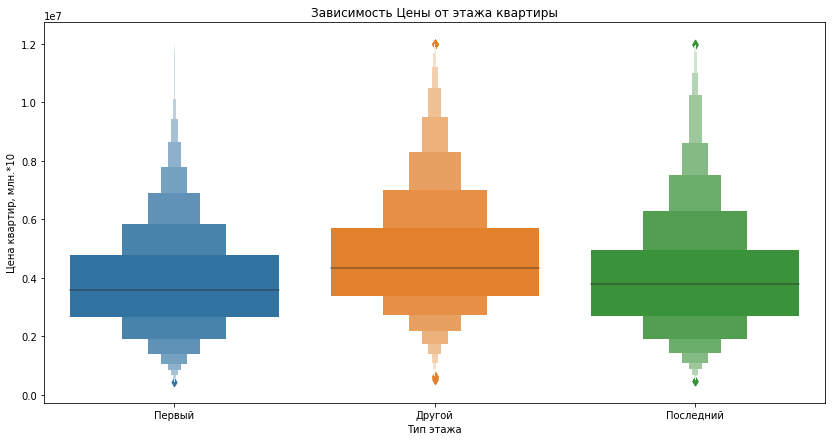

In [56]:
# Построим  график зависимости цены от этажа:
plt.figure(figsize=(14, 7))
sns.boxenplot(x='floors_type', y='last_price', data=clear_data )
plt.title('Зависимость Цены от этажа квартиры')
plt.xlabel('Тип этажа')
plt.ylabel('Цена квартир, млн.*10')
plt.show()

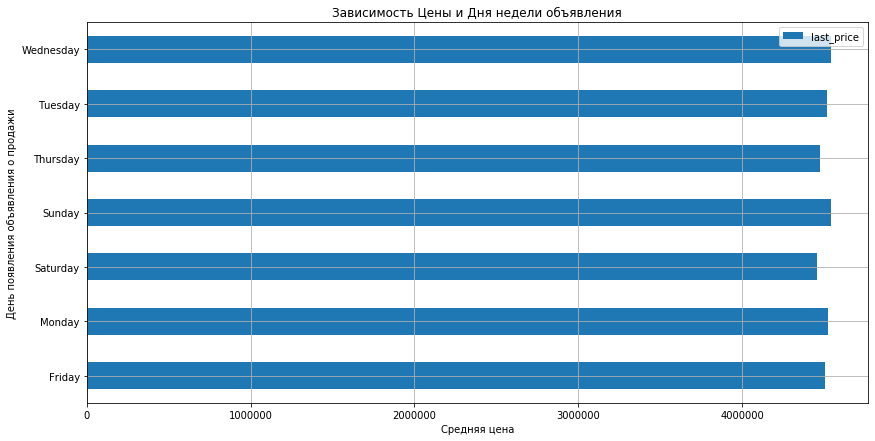

In [57]:
# Построим  график зависимости цены от дня недели продажи:
(clear_data
 .pivot_table(index = 'weekday', values = 'last_price', aggfunc='mean' )

 .plot(y='last_price', kind='barh', title='Зависимость Цены и Дня недели объявления', figsize=(14, 7), grid=True)
)
plt.xlabel('Средняя цена')
plt.ylabel('День появления объявления о продажи')
plt.show()

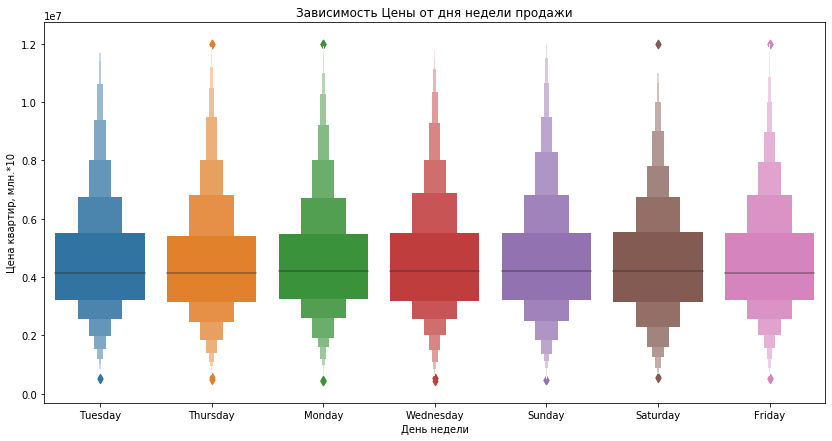

In [58]:
# Построим  график зависимости цены от дня недели продажи:
plt.figure(figsize=(14, 7))
sns.boxenplot(x='weekday', y='last_price', data=clear_data )
plt.title('Зависимость Цены от дня недели продажи')
plt.xlabel('День недели')
plt.ylabel('Цена квартир, млн.*10')
plt.show()

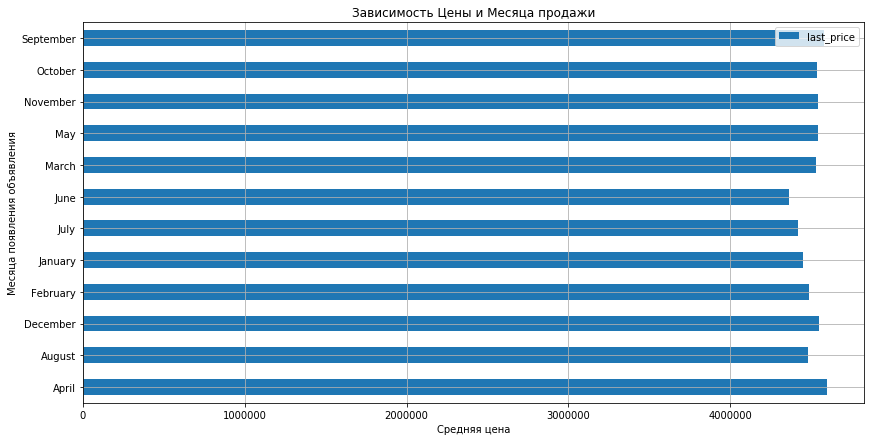

In [59]:
# Построим  график зависимости цены от месяца продажи:
(clear_data
 .pivot_table(index = 'month', values = 'last_price', aggfunc='mean' )
 
 .plot(y='last_price', kind='barh', title='Зависимость Цены и Месяца продажи', figsize=(14, 7), grid=True)
)
plt.xlabel('Средняя цена')
plt.ylabel('Месяца появления объявления')
plt.show()

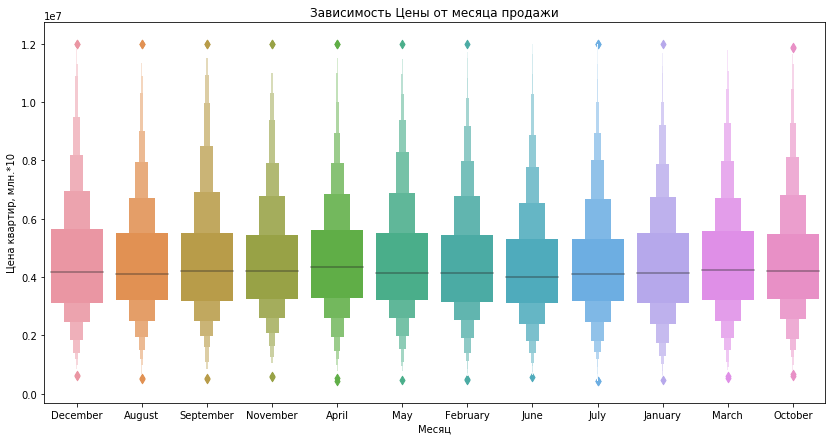

In [60]:
# Построим  график зависимости цены от месяца продажи:
plt.figure(figsize=(14, 7))
sns.boxenplot(x='month', y='last_price', data=clear_data )
plt.title('Зависимость Цены от месяца продажи')
plt.xlabel('Месяц')
plt.ylabel('Цена квартир, млн.*10')
plt.show()

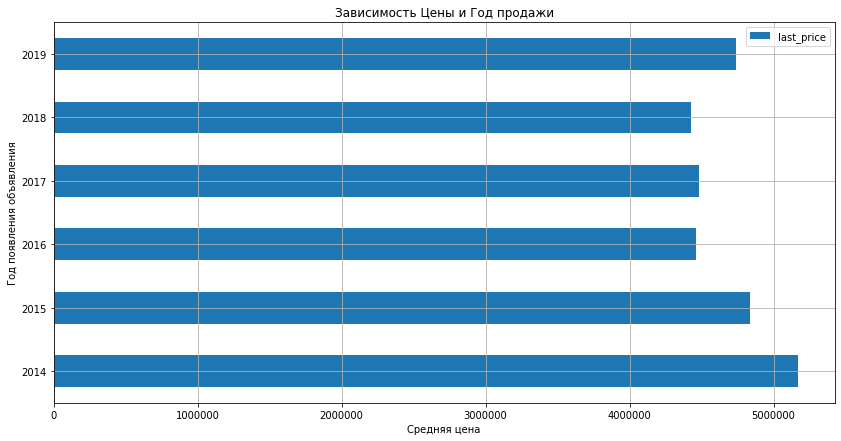

In [61]:
# Построим  график зависимости цены от года продажи:
(clear_data
 .pivot_table(index = 'year', values = 'last_price', aggfunc='mean' )
 
 .plot(y='last_price', kind='barh', title='Зависимость Цены и Год продажи', figsize=(14, 7), grid=True)
)
plt.xlabel('Средняя цена')
plt.ylabel('Год появления объявления')
plt.show()

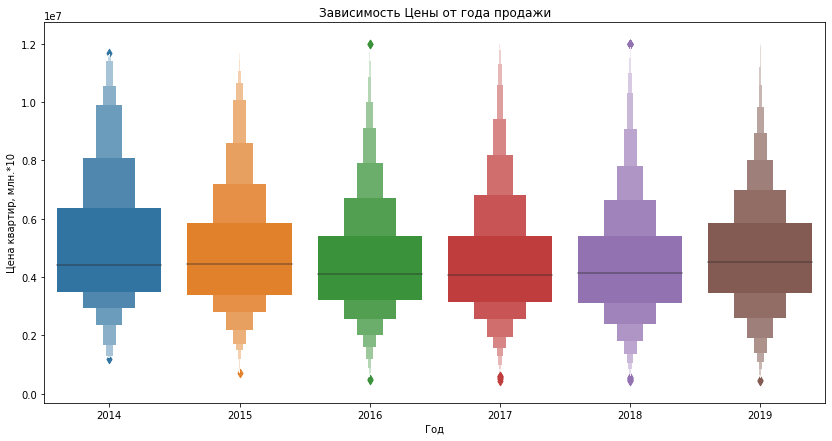

In [62]:
# Построим  график зависимости цены от года продажи:
plt.figure(figsize=(14, 7))
sns.boxenplot(x='year', y='last_price', data=clear_data )
plt.title('Зависимость Цены от года продажи')
plt.xlabel('Год')
plt.ylabel('Цена квартир, млн.*10')
plt.show()

#### Вывод

По результатам четвертого задания:
- построили график зависимости цены от площади, кол-во комнат и расстояния до центра.
- построили таблицу кореляции
- изучили зависимость цены от этажа и даты подачи обявления

Больше всего на цену влияет общая площадь квартиры  коэффициент корреляции 0.69, далее по убыванию влияния следует кол-во комнат 0.44.  Отрицательный коэффициент корреляции -0.27 цены квартиры от дальности до центра говорит о том, что при удалении от центра стоимость квартир падает.

Наблюдаем зависимость стоимости квартиры от этажа, самый дешевые квартиры продаются на первом этаже, самые дорогие с небольшим перевесом  на последнем этаже. Скорее всего на это влияет стоимость загородных коттеджей с их высокой стоимостью и низкой этажностью.

Существенного влияния от дня недели начала продажи  на стоимость нет, можно лишь отменить что в воскресенье (выходной) меньше всего, а в среду ( самый продуктивный рабочий день) больше всего.

Влияние от месяца так же не велико, в марте меньше всего (скорее всего люди устали от зимы и у них нет сил заниматься продажей), а максимальное в декабре ( люди мечтают встретить новый год в новом месте).

Зависимость от года продажи квартиры, так же практически отсутствует, за исключением 2014г,  резкий рост стоимости я связываю с политической обстановкой в РФ ( Крым, санкции, курс рубля)

#### Задание №5<a id="13"></a>

In [63]:
#Выведем 10 городов с с наибольшим числом объявлений:
top_10 = ( clear_data
 .groupby('locality_name')
 .agg({'last_price':'count'})
 .sort_values(by='last_price',ascending =False)
 .head(10)
)

In [64]:
# Проверим результат
display(top_10)

,last_price
locality_name,
санкт-петербург,10669
поселок мурино,465
поселок шушары,394
всеволожск,323
поселок парголово,310
колпино,307
пушкин,282
гатчина,273
выборг,201


In [65]:
# Создадим новый датафрейм с помощью среза данных по нужным нам городам:
clear_data_top10 = clear_data.query('locality_name in @top_10.index')

In [66]:
# Найдем среднию стоимость м2 в наших выбранных ранее городах:
(clear_data_top10
 .pivot_table(index='locality_name', values= 'price_m2',aggfunc='mean')
 .sort_values(by='price_m2', ascending =False).round(1)
)

,price_m2
locality_name,
санкт-петербург,103199.6
пушкин,99587.0
поселок парголово,90248.8
поселок мурино,85342.6
петергоф,82387.8
поселок шушары,78538.5
колпино,75352.9
гатчина,68172.1
всеволожск,66695.3


#### Вывод

По результатам пятого задания:
- нашли ТОП 10 самых популярных городов/поселков по размещенным объявлениям
- посчитали стоимость м2 для квартир из ТОП10

Самая дорогая стоимость м2 составляет 109405.6  в Санкт-Петербурге

Самая дешевая стоимость м2 составляет 57415.4 в Выборге

#### Задание №6<a id="14"></a>

In [67]:
# Создадим столбец с расстоянием до центра в км:
clear_data['city_centers_nearest_km'] = clear_data['cityCenters_nearest'] //1000
display(clear_data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,price_m2,data_time,weekday,month,year,floors_type,living_total_ratio,kitchen_total_ratio,city_centers_nearest_km
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.63,11,18.6,1,True,...,81.0,82920.8,2018-12-04,Tuesday,December,2018,Первый,0.460396,0.272277,18.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.70,5,34.3,4,True,...,558.0,92785.7,2015-08-20,Thursday,August,2015,Другой,0.612500,0.148214,13.0
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,2.65,12,14.4,5,True,...,55.0,95065.8,2018-09-10,Monday,September,2018,Другой,0.473684,0.299342,NaN
6,6,3700000.0,37.3,2017-11-02T00:00:00,1,2.64,26,10.6,6,True,...,155.0,99195.7,2017-11-02,Thursday,November,2017,Другой,0.284182,0.386059,19.0
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,2.70,24,52.7,22,True,...,95.0,110544.7,2019-04-18,Thursday,April,2019,Другой,0.736034,0.263966,11.0


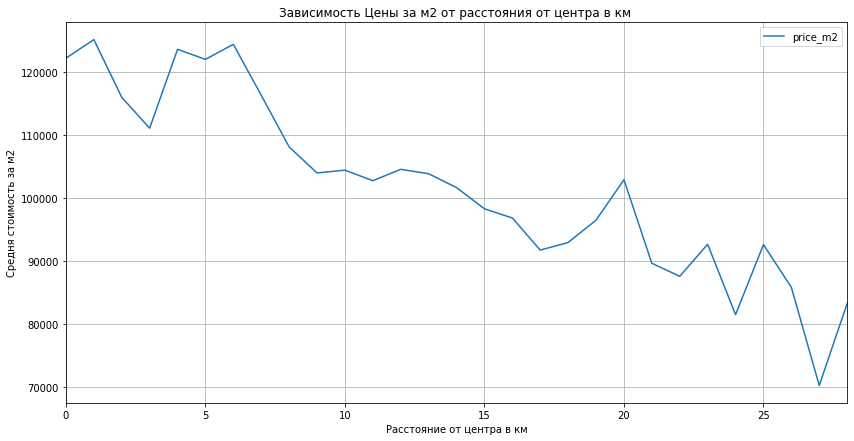

In [68]:
# Найдем зависимость средней цены за м2 от удаленности от центра города в км:
(clear_data
 .query('locality_name == "санкт-петербург"')
 .pivot_table(index='city_centers_nearest_km', values ='price_m2', aggfunc='mean' )
 .plot(title='Зависимость Цены за м2 от расстояния от центра в км ', figsize=(14, 7), grid=True)
)
plt.xlabel('Расстояние от центра в км')
plt.ylabel('Средня стоимость за м2')
plt.show()

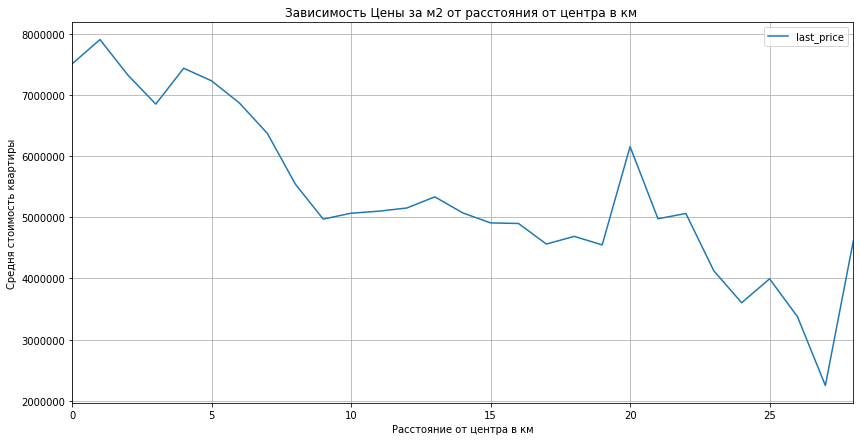

In [69]:
# Найдем зависимость средней цены за квартиру от удаленности от центра города в км:
(clear_data
 .query('locality_name == "санкт-петербург"')
 .pivot_table(index='city_centers_nearest_km', values ='last_price', aggfunc='mean' )
 .plot(title='Зависимость Цены за м2 от расстояния от центра в км ', figsize=(14, 7), grid=True)
)
plt.xlabel('Расстояние от центра в км')
plt.ylabel('Средня стоимость квартиры')
plt.show()

#### Вывод

По результатам шестого задания:
- выделили данные по СПб
- нашли зависимость средней цены за м2 от удаленности от центра города

На графике видно, что после 7 км идет уменьшение средней стоимости за м2, следовательно  будет считать область до 7км включительно центром города.

Выброс на 20 км возможно произошел из-за наличия элитного коттеджного поселка недалеко от города, что косвенно потверждает наличия зависимости высокой цены  от последнего этажа в задание №4.

#### Задание №7<a id="15"></a>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2bc4bbe250>,
      dtype=object)

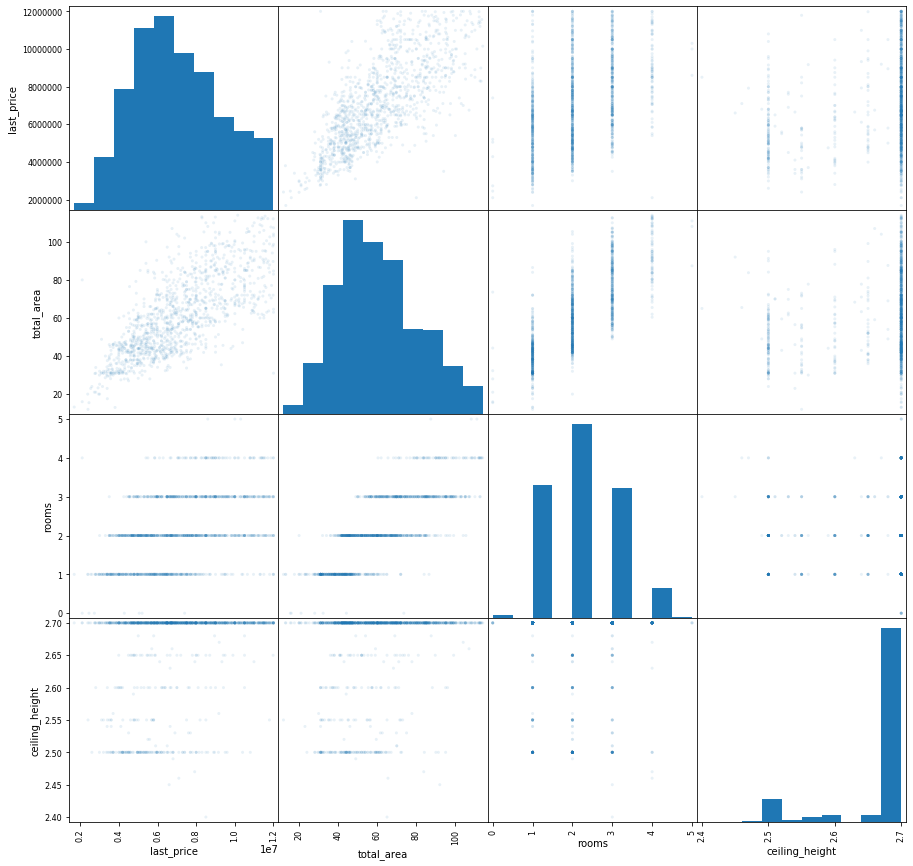

In [70]:
# Применим срез для данных, получили значения для центра СПб(до 7км)
# Построили диаграммы рассеивания для отдельных столбцов датафрейма
spb_centre_data =clear_data.query('locality_name == "санкт-петербург"and city_centers_nearest_km <=7')
spb_centre = spb_centre_data[['last_price','total_area','rooms','ceiling_height']]
pd.plotting.scatter_matrix(spb_centre,figsize=(15,15), alpha=0.1)


In [71]:
# Построим таблицу корреляции отдельных столбцев для центра СПб:
сorr_parm_centre_spb = spb_centre_data[['total_area','last_price','ceiling_height','rooms']].corr().round(2)
display(сorr_parm_centre_spb)

,total_area,last_price,ceiling_height,rooms
total_area,1.00,0.73,0.23,0.77
last_price,0.73,1.00,0.25,0.44
ceiling_height,0.23,0.25,1.00,0.07
rooms,0.77,0.44,0.07,1.00


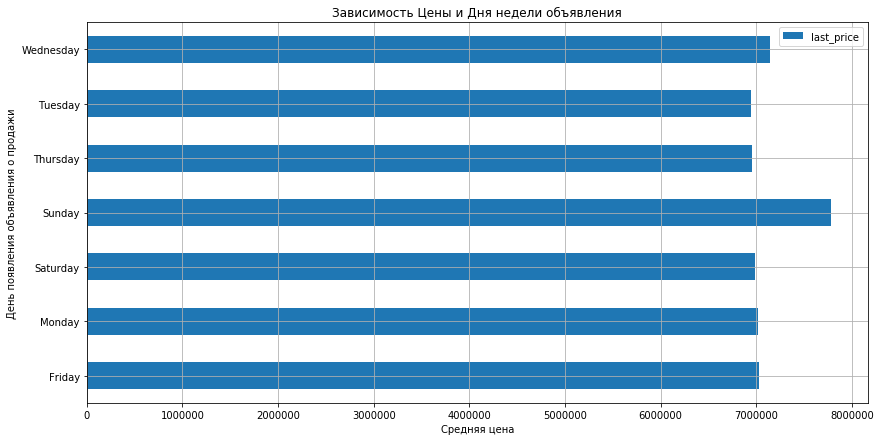

In [72]:
# Построим  график зависимости цены от дня недели продажи:
(spb_centre_data
 .pivot_table(index = 'weekday', values = 'last_price', aggfunc='mean' )

 .plot(y='last_price', kind='barh', title='Зависимость Цены и Дня недели объявления', figsize=(14, 7), grid=True)
)
plt.xlabel('Средняя цена')
plt.ylabel('День появления объявления о продажи')
plt.show()

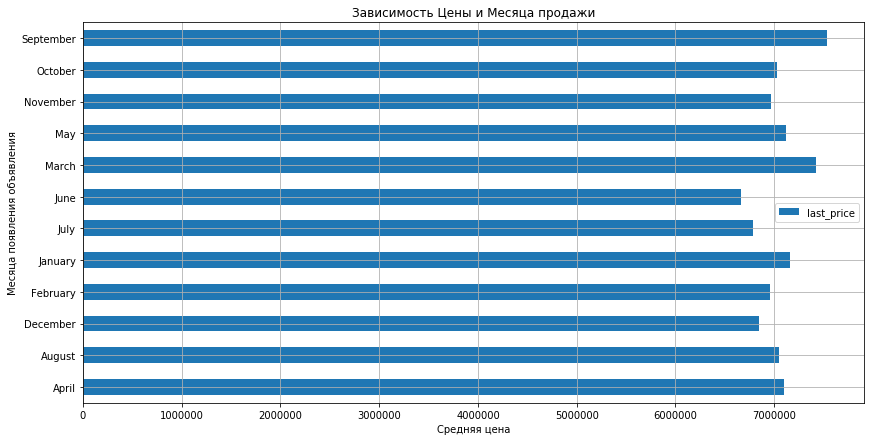

In [73]:
# Построим  график зависимости цены от месяца продажи:
(spb_centre_data
 .pivot_table(index = 'month', values = 'last_price', aggfunc='mean' )

 .plot(y='last_price', kind='barh', title='Зависимость Цены и Месяца продажи', figsize=(14, 7), grid=True)
)
plt.xlabel('Средняя цена')
plt.ylabel('Месяца появления объявления')
plt.show()

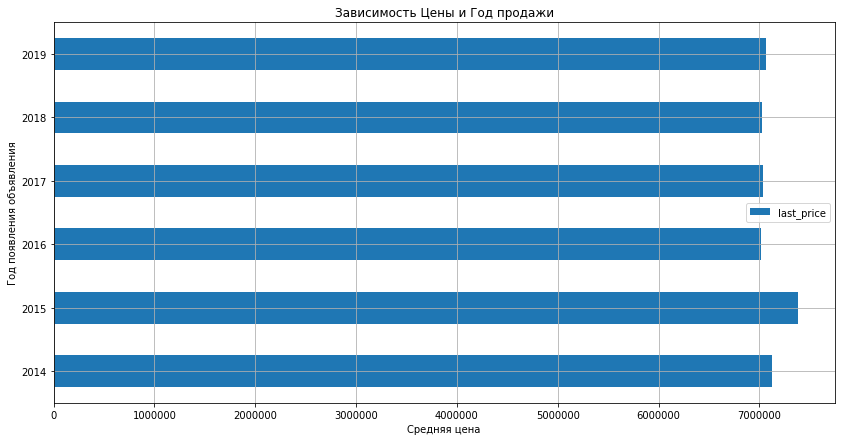

In [74]:
# Построим  график зависимости цены от года продажи:
(spb_centre_data
 .pivot_table(index = 'year', values = 'last_price', aggfunc='mean' )

 .plot(y='last_price', kind='barh', title='Зависимость Цены и Год продажи', figsize=(14, 7), grid=True)
)
plt.xlabel('Средняя цена')
plt.ylabel('Год появления объявления')
plt.show()

In [75]:
# Пытаемся понять почему в 2014г. так сильно отличаются значения центра города от остального города:
spb_centre_data.pivot_table(index = 'year', values = 'last_price', aggfunc='count')

,last_price
year,
2014,3
2015,108
2016,184
2017,487
2018,325
2019,99


In [76]:
clear_data.pivot_table(index = 'year', values = 'last_price', aggfunc='count')

,last_price
year,
2014,63
2015,771
2016,2027
2017,6012
2018,6163
2019,2054


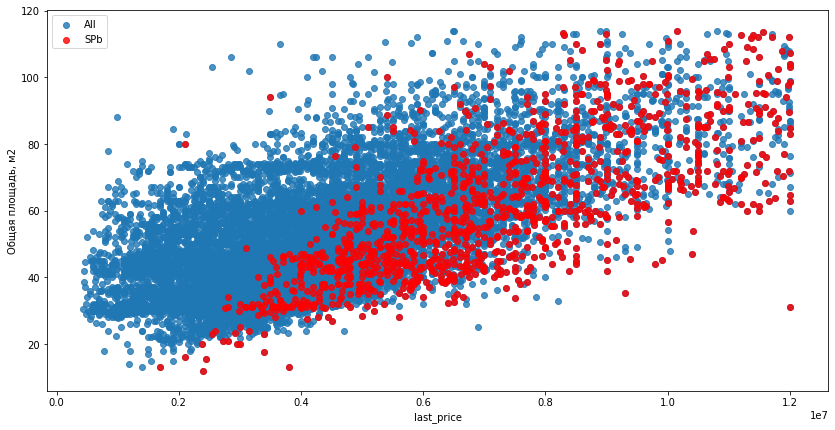

In [83]:
# Распределение зависимости стоимости квартиры от общей площади в центре и  за ним (красное - центр, синие -за центром):
fig, ax = plt.subplots(figsize=(14, 7))

sns.regplot(x='last_price', y='total_area', data=clear_data, ax=ax,fit_reg = False)

plt.xlabel('Стоимость квартиры, млн. *10')
plt.ylabel('Общая площадь, м2')

ax2 = ax.twinx()
g=sns.regplot(x='last_price', y='total_area', data= spb_centre_data, ax=ax2, color='r',fit_reg = False)
plt.ylabel('Общая площадь, м2')

plt.show()

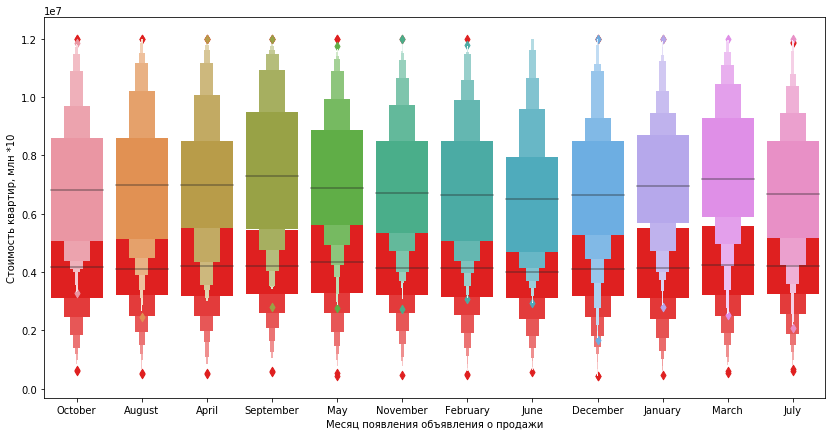

In [78]:
# Зависимость цены продажи квартиры от месяца в центре и за центром:
plt.figure(figsize=(14, 7))
sns.boxenplot(x='month', y='last_price', data=clear_data , color='r')
sns.boxenplot(x='month', y='last_price', data=spb_centre_data )
plt.xlabel('Месяц появления объявления о продажи')
plt.ylabel('Стоимость квартир, млн *10')
plt.show()

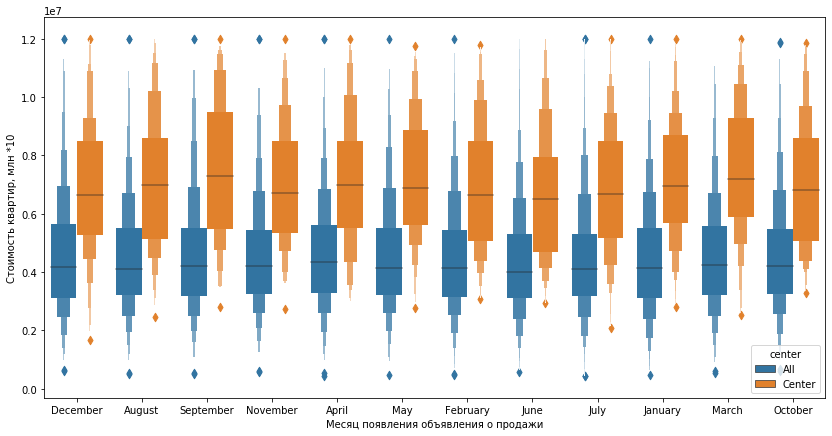

In [84]:
# Зависимость цены продажи квартиры от месяца в центре и за центром:
clear_data['center'] = 'All'
spb_centre_data['center'] = 'Center'

temp = pd.concat([clear_data, spb_centre_data])
plt.figure(figsize=(14, 7))
sns.boxenplot(x='month', y='last_price', data=temp , hue='center')
plt.xlabel('Месяц появления объявления о продажи')
plt.ylabel('Стоимость квартир, млн *10')
plt.show()

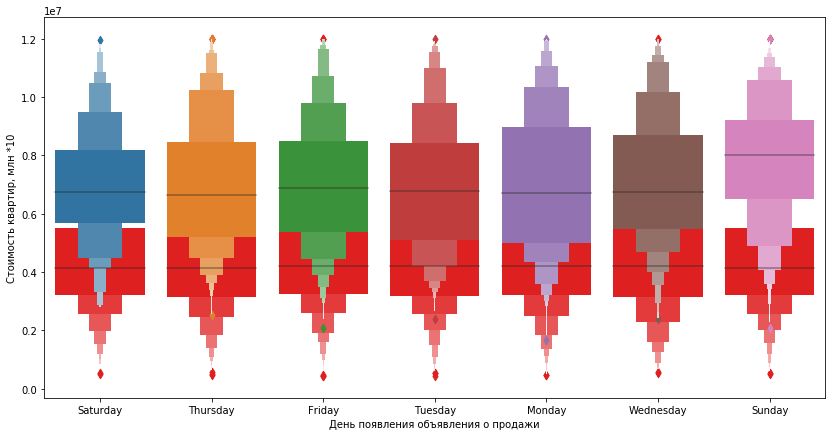

In [79]:
# Зависимость цены продажи квартиры от дня недели в центре и за центром:
plt.figure(figsize=(14, 7))
sns.boxenplot(x='weekday', y='last_price', data=clear_data , color='r')
sns.boxenplot(x='weekday', y='last_price', data=spb_centre_data )
plt.xlabel('День появления объявления о продажи')
plt.ylabel('Стоимость квартир, млн *10')
plt.show()

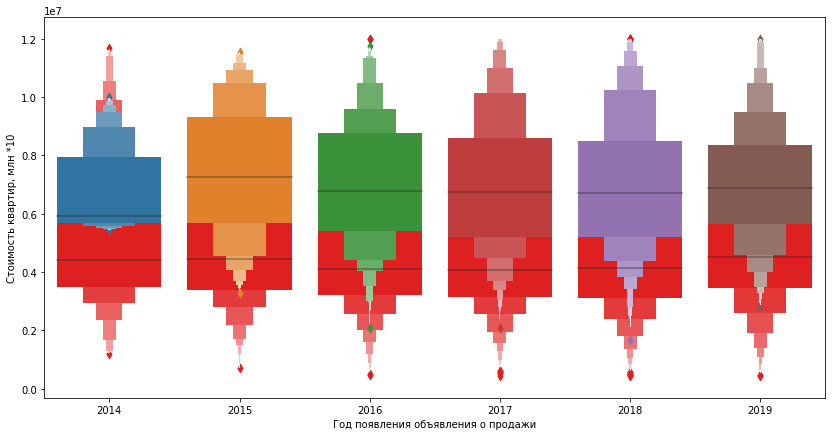

In [80]:
# Зависимость цены продажи квартиры от года в центре и за центром:
plt.figure(figsize=(14, 7))
sns.boxenplot(x='year', y='last_price', data=clear_data , color='r')
sns.boxenplot(x='year', y='last_price', data=spb_centre_data )
plt.xlabel('Год появления объявления о продажи')
plt.ylabel('Стоимость квартир, млн *10')
plt.show()

#### Вывод

По результатам седьмого задания:
- применили срез, получили значения для центра СПб(до 7км)
- построили диаграммы рассеивания 
- рассчитали коэффицент корреляции цены от параметров
- построили графики зависимости цены от дня, месяца и года начала продажи.

Больше всего на цену влияет общая площадь квартиры коэффициент корреляции 0.65, далее по убыванию влияния следует кол-во комнат 0.42, меньше всего влияет на стоимости квартиры высота потолка коэффициент коррлеяции 0.17. Скорее всего потому, что фонд недвижимости в центре города сам по себе состоит из старых домов, где высота потолка изначально была высокая , что увеличивает конкуренцию по данному параметру.

Существенного влияния от дня недели начала продажи на стоимость нет, можно лишь отменить что в воскресенье (выходной) меньше всего, а в пятницу больше всего. Отличий от остального города нет, все люди и хотят отдыхать в воскресенье.

Влияние от месяца так же не велико, в ноябре меньше всего, а максимальное в сентябре. Трудно обяснить почему так, наверное просто такие данные.

Яркая противоположность от остального города, что именно в 2014 наблюдается резкое снижение стоимости жилья в центральной части города, возможно этом можно обяснить тем, что обявлений существено меньше, чем в остальные года или тем что люди живущие в центры в тот неспокойный год решили просто переждать.

# Попытался наложить категориальные графики

### Шаг 5. Общий вывод<a id="16"></a>

В ходе нашей исследовательской работе мы:

- проанализировали исходные данные, выявили  пропущенные значения в столбцах, неправильный тип данных в столбцах, выявили аномальные значения в столбцах;
- предобработали данные, а именно убрали пропущенные значения в столбцах необходимые нам для дальнейшей работы, проработали наименнования городов и поселков, изменили тип данных в определенных столбцах;
- рассчитали нужные значения по заданию, а именно стоимость м2, преобразовали дату размещения обявления специальным методом, добавили столбцы соотношения жилой площадью и площади кухни к общей площади, разобрались с этажностью квартир;
- выполнили мини исследования по 7 пунктам заданий.

Повторим основные моменты:

- типичная квартира в продаже: Одно-двух комнатная квартира с общей площадью 50м2 и высотой потолков 2.7м за 4млн. рублей;
- 45-50 типичный срок продажи квартиры, все что меньше отлично, все что больше 80-95 потенциально странно, возможно были проблемы с квартирой;
- на стоимость квартиры , что в центре СПб, что дальше влияет в первую очередь общая площадь квартиры, далее кол-во комнат;
- для периферии с увеличением дальности от центры уменьшается цена, а для центральног района высота потолка мало сказывается на стоимости;
- исключив выбросы получили размах площади (от 35-112 м2), размах цен (от 3.4-12 млн.), кол-во комнат (от 0 студии до 6), размах высоты потолков (2,5 до 3.5 м.);
- самая дорогая стоимость м2 в СПб (10940.6 руб.) , а самая дешевая стоимость м2 в Выборге;
- определили центральный район г. Санкт-Петербурга в радиусе 7км;
- влияение на стоимость квартиры от дня недели, месяца практически нет, но любопытный момент в 2014г.  выбивается из общей картины, возможно мы не значем того, что знают люди живущие в центре города :)

Что нужно доработать :
- определиться почему столько пропущенных значений в тех столбцах, которые проставляются автоматически, возможно когда пользователь прописывает адрес поиск не находит его в свой базе из-за нарушений регистр и тд. Вариант решения предлагать пользователю выбирать свой адрес из выпадающего списка.

